In [27]:
import pandas as pd
import numpy as np
import math
import pickle

from scipy import stats
import scipy.io
from scipy.spatial.distance import pdist
from scipy.linalg import cholesky
from scipy.io import loadmat

import matlab.engine as engi
import matlab as mat

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report,roc_auc_score,recall_score,precision_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from pyearth import Earth
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer

from src import SMOTE
from src import CFS
from src import metrices_V2 as metrices

import platform
from os import listdir
from os.path import isfile, join
from glob import glob
from pathlib import Path
import sys
import os
import copy
import traceback
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns

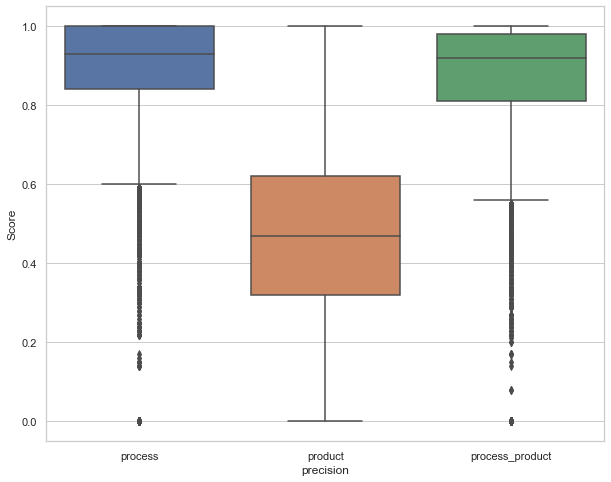

<Figure size 432x288 with 0 Axes>

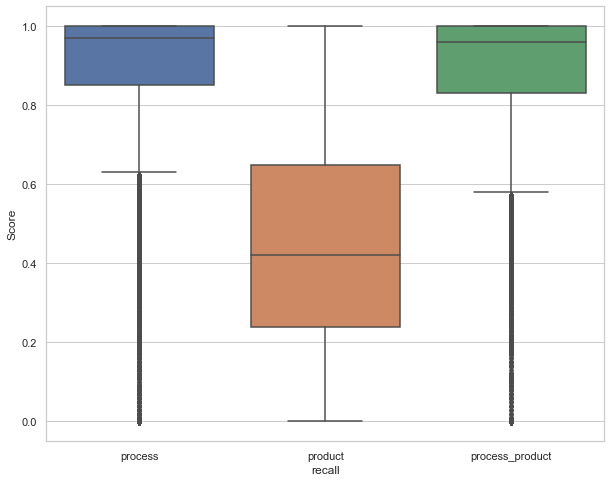

<Figure size 432x288 with 0 Axes>

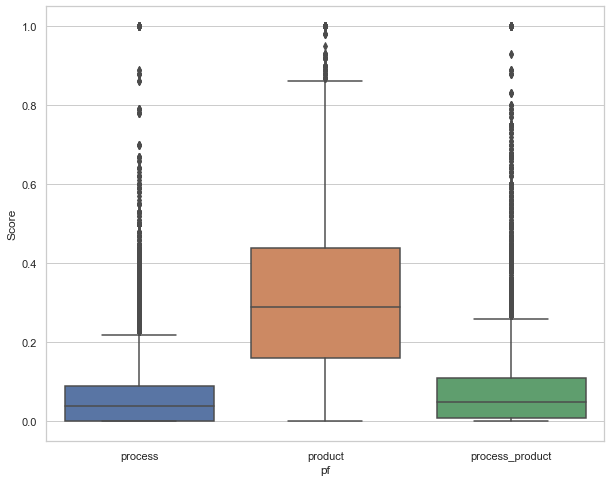

<Figure size 432x288 with 0 Axes>

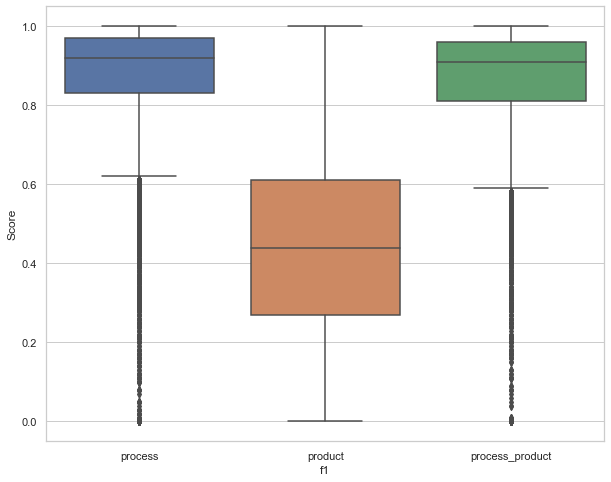

<Figure size 432x288 with 0 Axes>

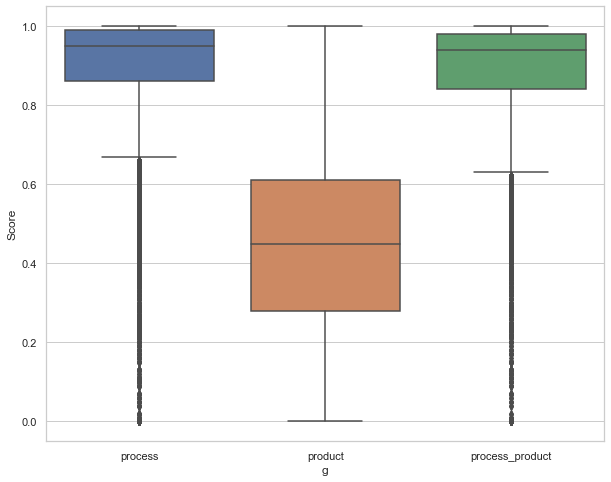

<Figure size 432x288 with 0 Axes>

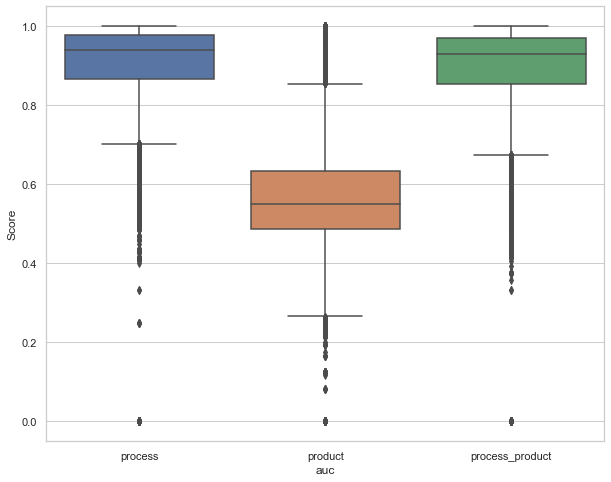

<Figure size 432x288 with 0 Axes>

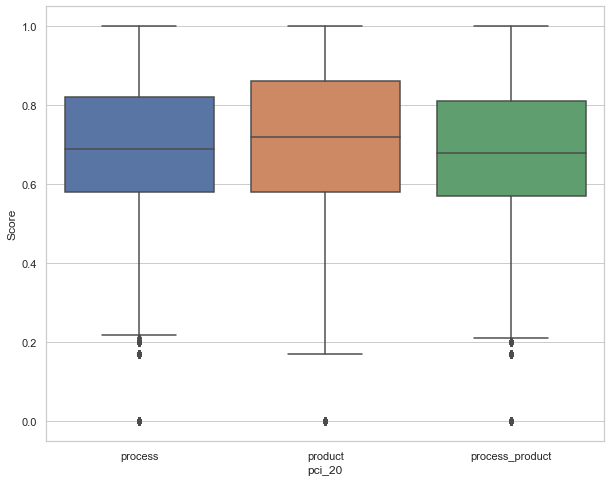

<Figure size 432x288 with 0 Axes>

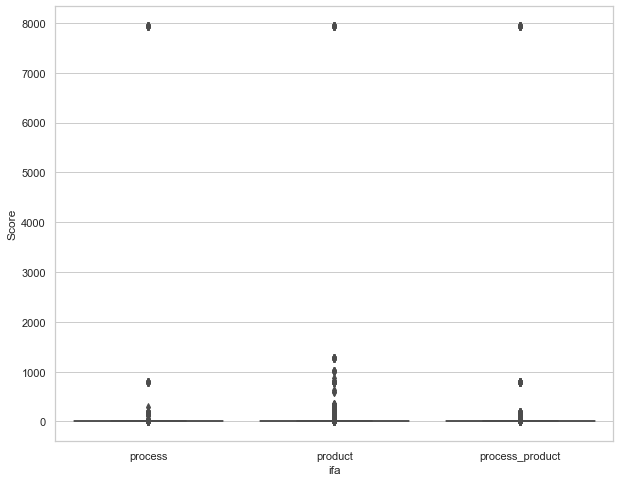

<Figure size 432x288 with 0 Axes>

In [120]:
# With file level
dfs = ['process','product','process+product']
metrics = ['precision', 'recall', 'pf', 'f1', 'g', 'auc', 'pci_20', 'ifa']
for metric in metrics:
    data = []
    for df in dfs:
        file = pd.read_pickle('results/Performance/commit_guru_file_specific/' + df +'_700_rf_5_fold_5_repeat.pkl')
        l = [item for sublist in list(file[metric].values()) for item in sublist]
        data.append(l)
    data_df = pd.DataFrame(data)
    data_df.index = [['process','product','process_product']]
    x = pd.melt(data_df.T)
    x.columns = [metric,'Score']
    
    fig, ax = plt.subplots(figsize=(10,8))
    plt.figure()
    ax = sns.boxplot(x = metric, y = 'Score',ax=ax ,data=x)
#     fig.savefig('results/image/' + metric + '.png')

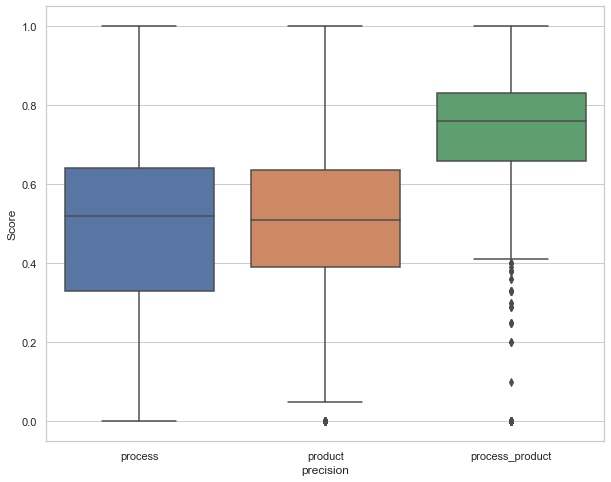

<Figure size 432x288 with 0 Axes>

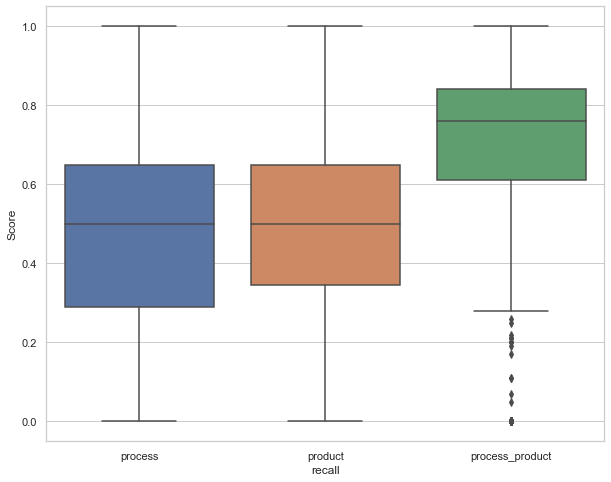

<Figure size 432x288 with 0 Axes>

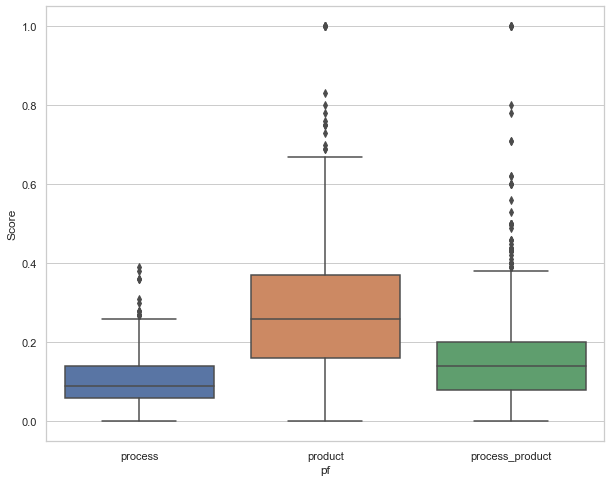

<Figure size 432x288 with 0 Axes>

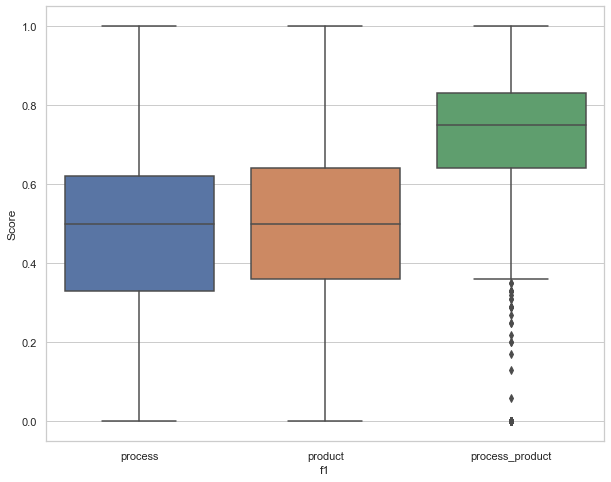

<Figure size 432x288 with 0 Axes>

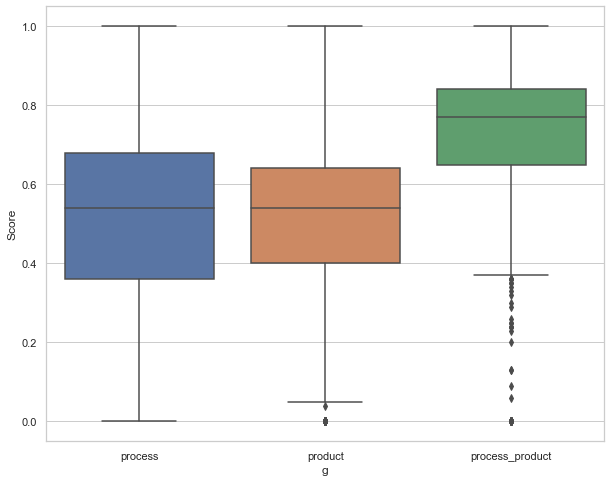

<Figure size 432x288 with 0 Axes>

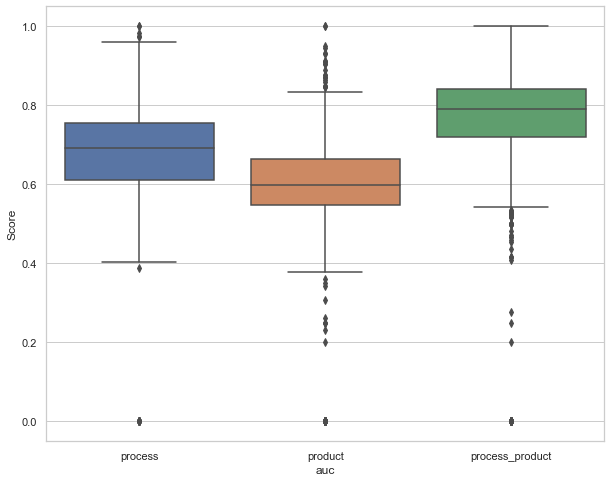

<Figure size 432x288 with 0 Axes>

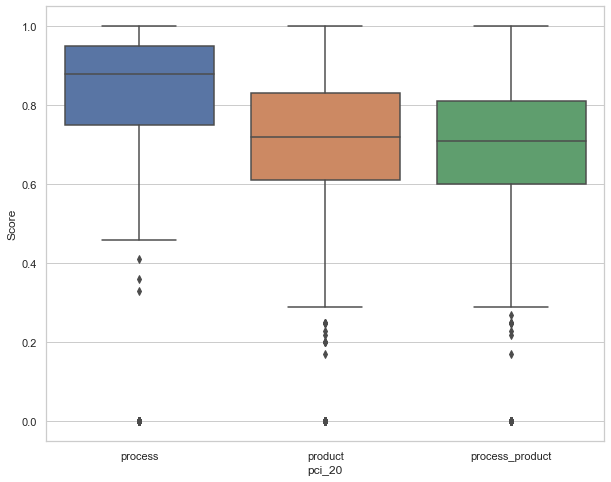

<Figure size 432x288 with 0 Axes>

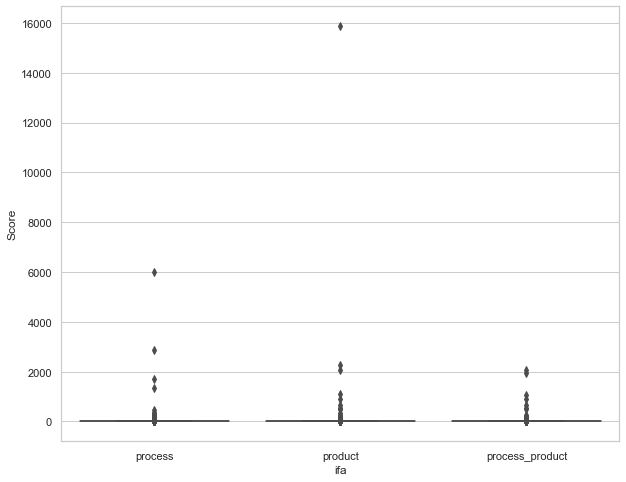

<Figure size 432x288 with 0 Axes>

In [117]:
# With Commit Level
dfs = ['process','product','process+product']
metrics = ['precision', 'recall', 'pf', 'f1', 'g', 'auc', 'pci_20', 'ifa']
for metric in metrics:
    data = []
    for df in dfs:
        file = pd.read_pickle('results/Performance/With_median_commit_guru_data/' + df +'_1000.pkl')
        data.append(list(file[metric].values()))
    data_df = pd.DataFrame(data)
    data_df.index = [['process','product','process_product']]
    x = pd.melt(data_df.T)
    x.columns = [metric,'Score']
    
    fig, ax = plt.subplots(figsize=(10,8))
    plt.figure()
    ax = sns.boxplot(x = metric, y = 'Score',ax=ax ,data=x)
    fig.savefig('results/image/commit-level/' + metric + '.png')

In [91]:
data=pd.melt(data_df.T)

In [95]:
data[data['variable'] == 1]

,variable,value
1540,2,0.92
1541,2,1.00
1542,2,0.97
1543,2,0.96
1544,2,0.40
...,...,...
2305,2,0.96
2306,2,0.97
2307,2,0.95
2308,2,0.97
